In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 69658 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=2048,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2177/2177 [==============================] - 201s 90ms/step - loss: 1.2000 - accuracy: 0.6429 - val_loss: 0.5101 - val_accuracy: 0.8357
Epoch 2/10
2177/2177 [==============================] - 192s 88ms/step - loss: 0.3751 - accuracy: 0.8806 - val_loss: 0.2467 - val_accuracy: 0.9184
Epoch 3/10
2177/2177 [==============================] - 202s 93ms/step - loss: 0.2226 - accuracy: 0.9269 - val_loss: 0.2545 - val_accuracy: 0.9207
Epoch 4/10
2177/2177 [==============================] - 201s 92ms/step - loss: 0.1542 - accuracy: 0.9485 - val_loss: 0.2183 - val_accuracy: 0.9313
Epoch 5/10
2177/2177 [==============================] - 199s 91ms/step - loss: 0.1092 - accuracy: 0.9640 - val_loss: 0.1903 - val_accuracy: 0.9402
Epoch 6/10
2177/2177 [==============================] - 191s 88ms/step - loss: 0.0869 - accuracy: 0.9710 - val_loss: 0.1616 - val_accuracy: 0.9522
Epoch 7/10
2177/2177 [==============================] - 191s 88ms/step - loss: 0.0726 - accuracy: 0.9764 - val_loss: 0

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2177/2177 [==============================] - 63s 29ms/step - loss: 0.0500 - accuracy: 0.9839
Training accuracy: 0.9839357733726501


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 16s 29ms/step - loss: 0.1678 - accuracy: 0.9484
Validation accuracy: 0.9484407305717468


In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'loss': [1.2000197172164917,
  0.3751222789287567,
  0.22255079448223114,
  0.15422970056533813,
  0.1092267781496048,
  0.08687371015548706,
  0.07257544994354248,
  0.061803244054317474,
  0.054372046142816544,
  0.04900818690657616],
 'accuracy': [0.6428981423377991,
  0.8806023597717285,
  0.9269430637359619,
  0.9484912157058716,
  0.9639955163002014,
  0.9709868431091309,
  0.9764420390129089,
  0.980404257774353,
  0.982758641242981,
  0.9844669699668884],
 'val_loss': [0.510079026222229,
  0.24672836065292358,
  0.2545326054096222,
  0.21825040876865387,
  0.1903081238269806,
  0.16160033643245697,
  0.13706235587596893,
  0.17576104402542114,
  0.17699174582958221,
  0.1678386926651001],
 'val_accuracy': [0.835704505443573,
  0.9184498190879822,
  0.9207261800765991,
  0.9313111901283264,
  0.9402458667755127,
  0.9521966576576233,
  0.9594810009002686,
  0.9499772191047668,
  0.9470748901367188,
  0.9484407305717468]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


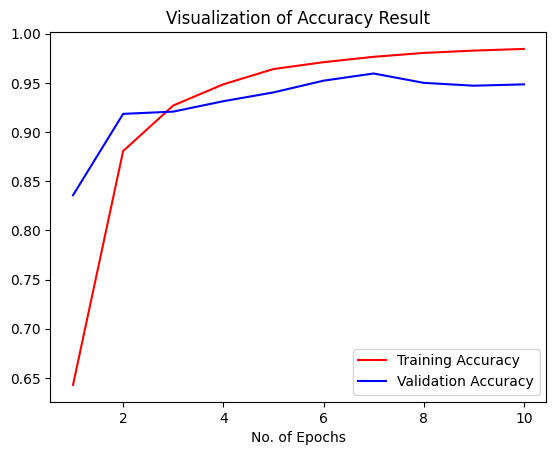

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 59s 3ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
# Precision Recall Fscore///////////////////////
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.86      0.91       504
                                 Apple___Black_rot       1.00      0.91      0.95       497
                          Apple___Cedar_apple_rust       0.95      0.96      0.95       440
                                   Apple___healthy       0.89      0.97      0.93       502
                               Blueberry___healthy       0.92      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.93      0.99      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.93      0.91       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.94      0.

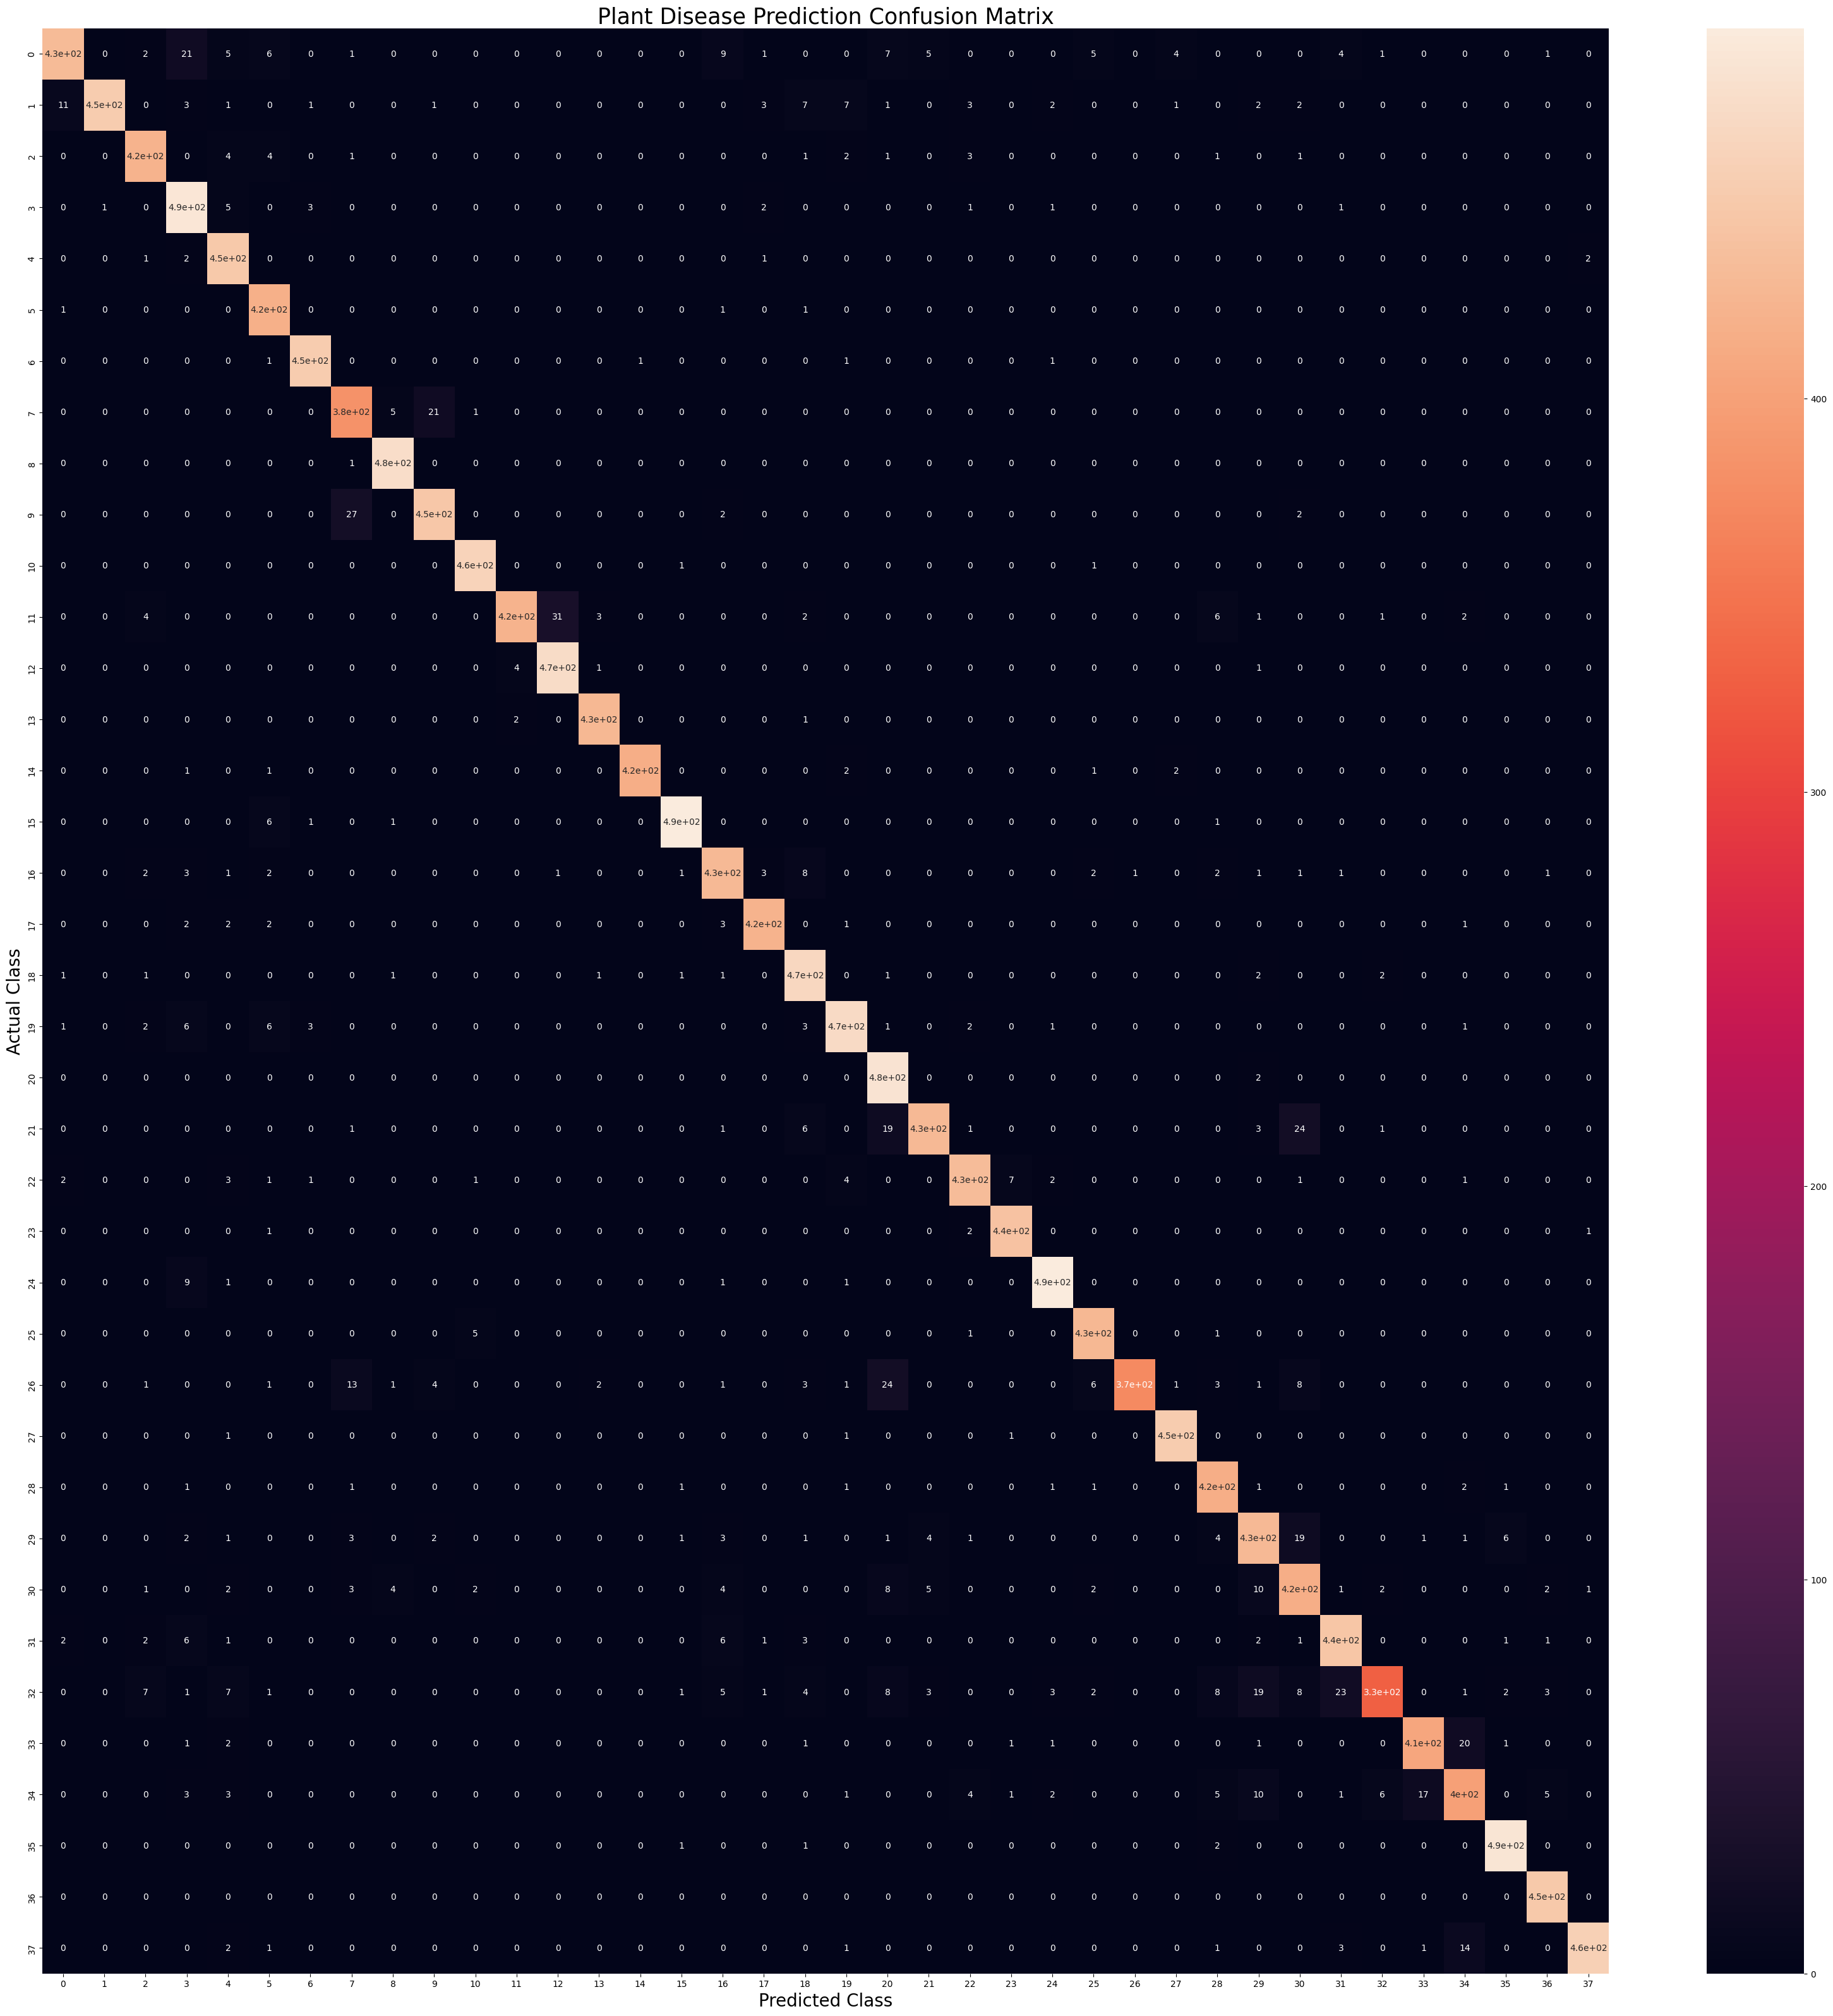

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()